# **EDA Project - Analysis of AMCAT data**

**ABSTRACT**

This project report presents an exploratory data analysis (EDA) of the AMCAT dataset, focusing on salary as the target variable. The analysis aims to uncover trends and relationships among designations, gender, specializations, college GPA, and job cities. Initial data preprocessing included the removal of duplicate entries and correction of data types for accuracy. Univariate analysis revealed insights into salary distributions and disparities among different designations and genders through box plots. The relationship between salary and continuous variables, such as college GPA, was explored using scatter plots, indicating a positive correlation. Bivariate analysis utilized correlation coefficients and heatmaps to investigate relationships among variables, alongside grouped box plots for salary comparisons across categories. The visualizations, including histograms and bar charts, effectively illustrated key trends and highlighted regional salary disparities. This analysis provides valuable insights into salary trends and potential gender pay gaps, paving the way for further research and strategic recommendations in the field.

**INTRODUCTION**

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves examining datasets to summarize their main characteristics, often using visual methods. The purpose of EDA is to gain insights, identify patterns, spot anomalies, and check assumptions through statistical graphics and other data visualization techniques. Here are some key aspects of EDA:

1. **Data Visualization**: Utilizing graphs like histograms, box plots, scatter plots, and bar charts to visualize data distributions and relationships.

2. **Descriptive Statistics**: Calculating measures such as mean, median, mode, variance, and standard deviation to understand the data's central tendency and dispersion.

3. **Identifying Patterns**: Exploring correlations and trends within the data to uncover relationships between variables.

4. **Handling Missing Values**: Detecting and addressing missing or incomplete data entries, either by imputation or removal.

5. **Outlier Detection**: Identifying and examining outliers that may skew analysis or indicate interesting insights.

6. **Data Transformation**: Considering necessary transformations to meet the assumptions of statistical models (e.g., normalizing data).

EDA is typically the first step in data analysis before moving on to more formal modeling or hypothesis testing, allowing analysts to form a deeper understanding of the dataset.


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

1. FIX THE COLUMN NAMES

In [ ]:
#load the dataset
path = '/content/drive/MyDrive/data.xlsx'
df = pd.read_excel(path)
#fix the column
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Here, the column "Unnamed" is dropped, thus the column is first cleaned.

In [ ]:
df.shape

(3998, 38)

In [ ]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

2. FIX THE DATATYPE OF THE COLUMN

In [ ]:
#fix the datatype of the column
df['Salary'] = df['Salary'].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

Here, the datatype of the column "Salary" is changed to float.

3. UNIVARIATE ANALYSIS


In [ ]:
df["Salary"].describe()


,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


In [ ]:
#Getting insigts from Designation
#How many different Designations are chosen by the emplyees?
desig_unique = df["Designation"].unique()
desig_nunique = df["Designation"].nunique()
desig_count = df["Designation"].value_counts()
print("Unique Designations:", desig_unique)
print("No. of Unique Designations:", desig_nunique)
print("Total Count of each Designation:", desig_count)


Unique Designations: ['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant system engineer'
 'android developer' 'customer service' 'test engineer' 'java developer'
 'engineer' 'recruit

There are 419 various different designations chosen by employees.
Of all Designations, Software engineer has the highest number of employees.

In [ ]:
#Getting insights from JobCity
#How many unique Job Cities are there?
jobcity_unique = df["JobCity"].unique()
jobcity_nunique = df["JobCity"].nunique()
jobcity_count = df["JobCity"].value_counts()
print("Unique JobCity:", jobcity_unique)
print("No. of Unique JobCities:", jobcity_nunique)
print("Total Count of each JobCity:", jobcity_count)

Unique JobCity: ['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' -1 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore'
 'Ahmedabad' 'Kochi/Cochin' 'Bankura' 'Bengaluru' 'Mysore ' 'Kanpur '
 'jaipur' 'Gurgaon ' 'bangalore' 'CHENNAI' 'Vijayawada' 'Kochi' 'Beawar'
 'Alwar' 'NOIDA' 'Greater noida' 'Siliguri ' 'raipur' 'gurgaon' 'Bhopal'
 'Faridabad' 'Jodhpur' 'udaipur' 'Muzaffarpur' 'Kolkata`' 'Bulandshahar'
 'Haridwar' 'Raigarh' 'Visakhapatnam' 'Jabalpur' 'hyderabad' 'Unnao'
 '

There are 339 distinct Job Cities where employees are located, with Bangalore having the largest number of employees.

In [ ]:
#Do female workers are more than male workers?
gender_unique = df["Gender"].unique()
gender_nunique = df["Gender"].nunique()
gender_count = df["Gender"].value_counts()
print("Unique Gender:", gender_unique)
print("No. of Unique Gender:", gender_nunique)
print("Total Count of each Gender:", gender_count)

Unique Gender: ['f' 'm']
No. of Unique Gender: 2
Total Count of each Gender: Gender
m    3041
f     957
Name: count, dtype: int64


There are 3,041 male employees and 957 female employees, with the number of males being significantly higher.

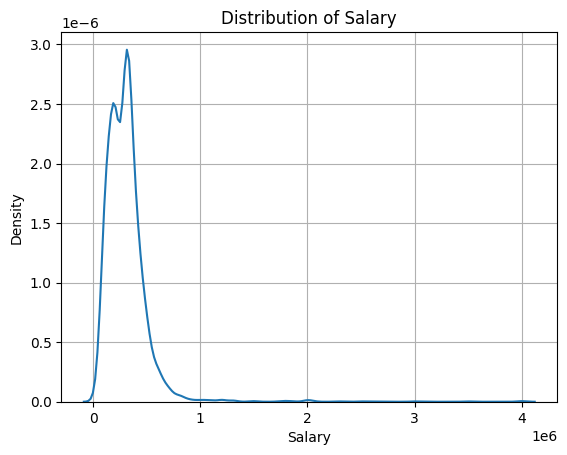

In [ ]:
#Visual
sns.kdeplot(data=df["Salary"])
plt.grid()
plt.title("Distribution of Salary")
plt.show()

In [ ]:
#How many distinct Specializations are there and which has the highest frequency?
df1 = df["Specialization"].value_counts().head(5)
df1

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244


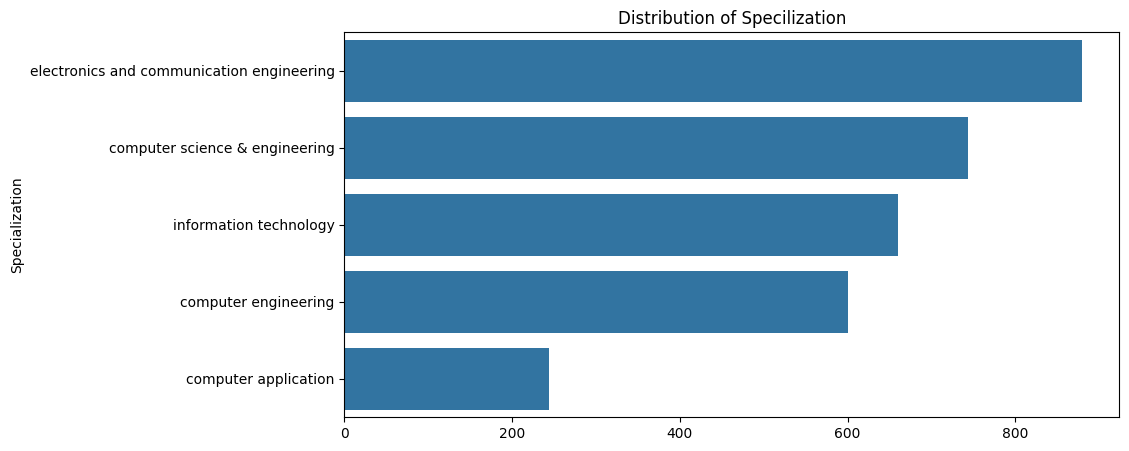

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=df1.index,x=df1.values)
plt.title("Distribution of Specilization")
plt.show()

The frequency of each Specialization is provided, and most employees come from an Electronics and Communication Engineering background.

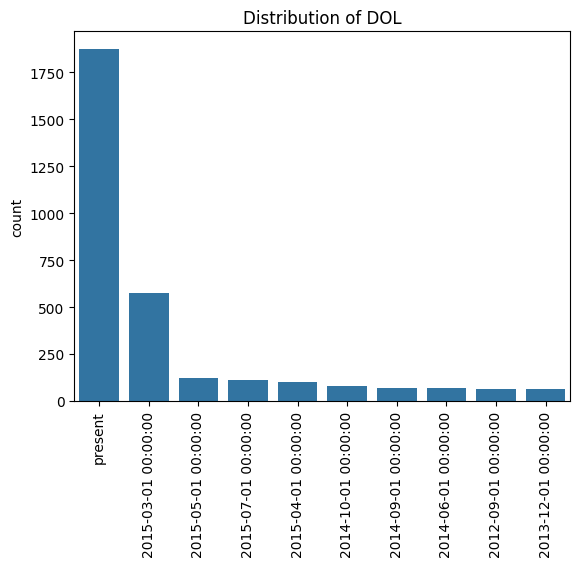

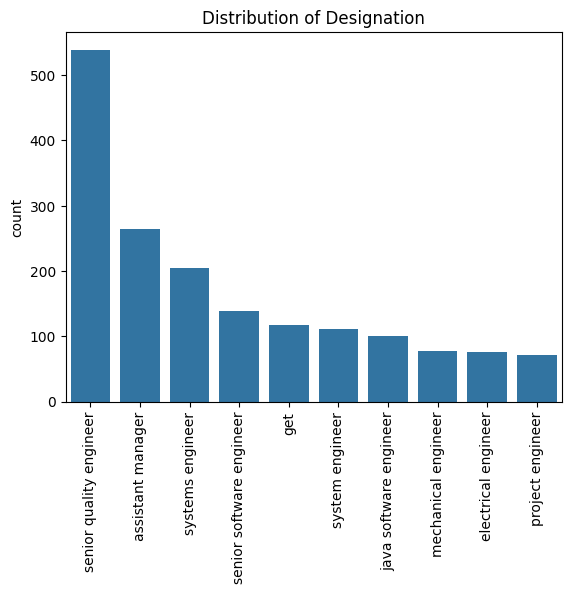

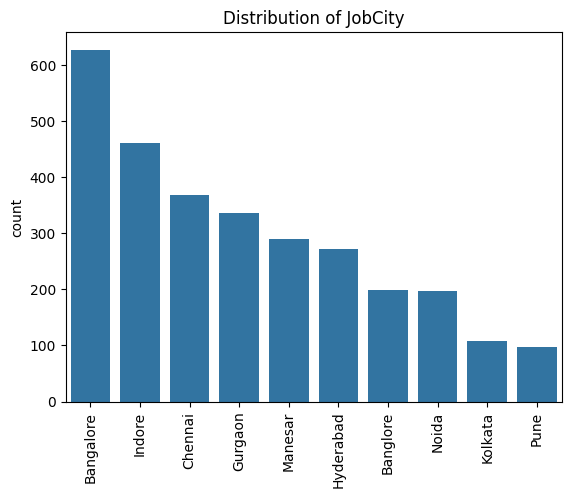

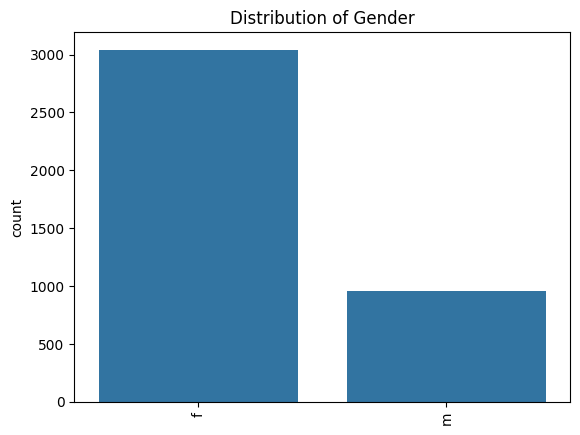

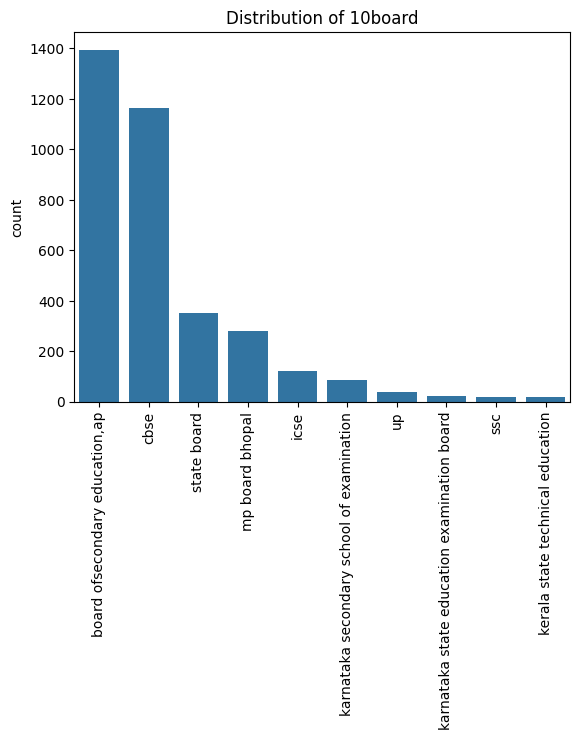

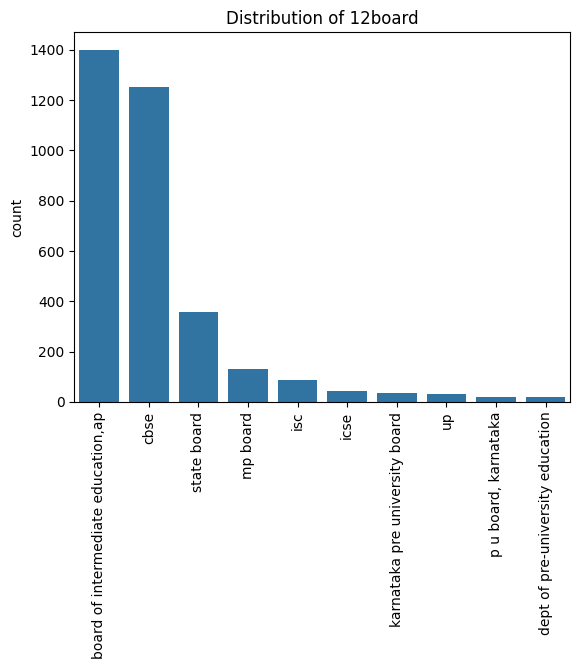

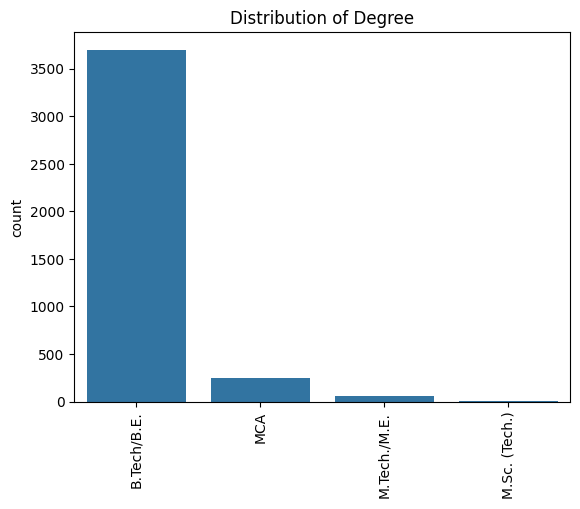

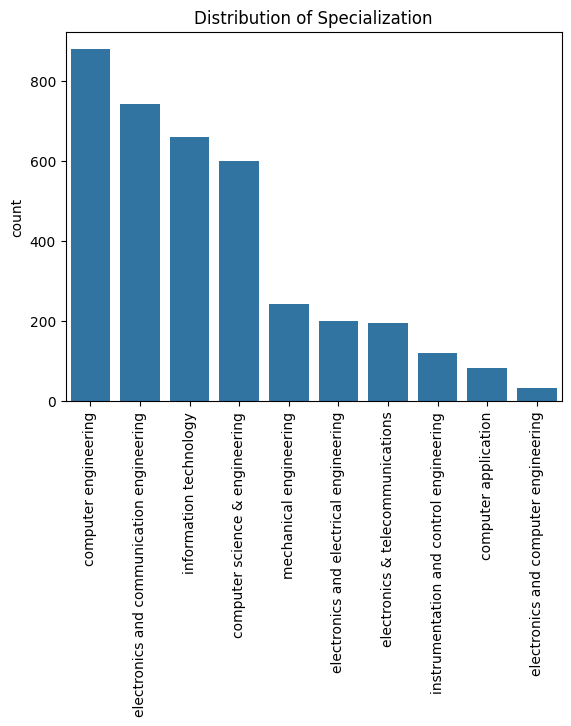

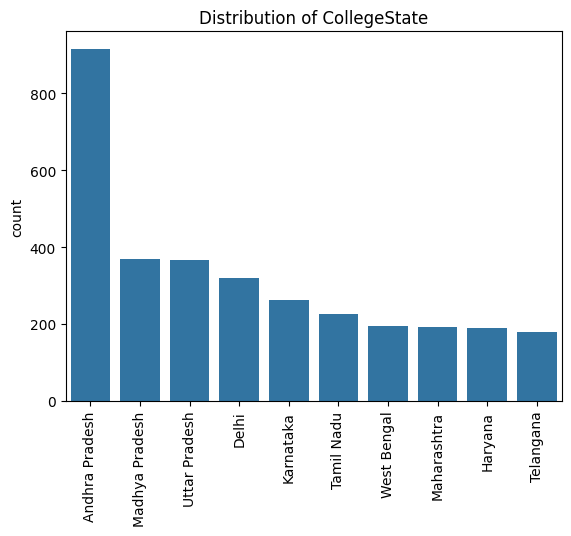

In [ ]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.barplot(x=df[i].unique()[:10],y=df[i].value_counts()[:10])
        plt.title("Distribution of {}".format(i))
        plt.xticks(rotation=90)
        plt.show()

Here's the distribution for various categorical columns in the AMCAT dataset.

4. BIVARIATE ANALYSIS

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


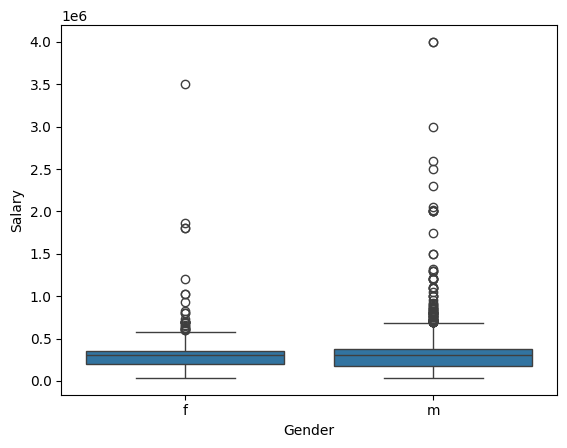

In [ ]:
#How Salary is related with Gender?
sns.boxplot(x = "Gender", y = "Salary", data = df)
plt.show()

This insight reveals that male employees are offered higher salaries compared to female employees.

In [ ]:
#Which Specialization has the highest Academic Score?
g1=df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA", ascending = False)
g1

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


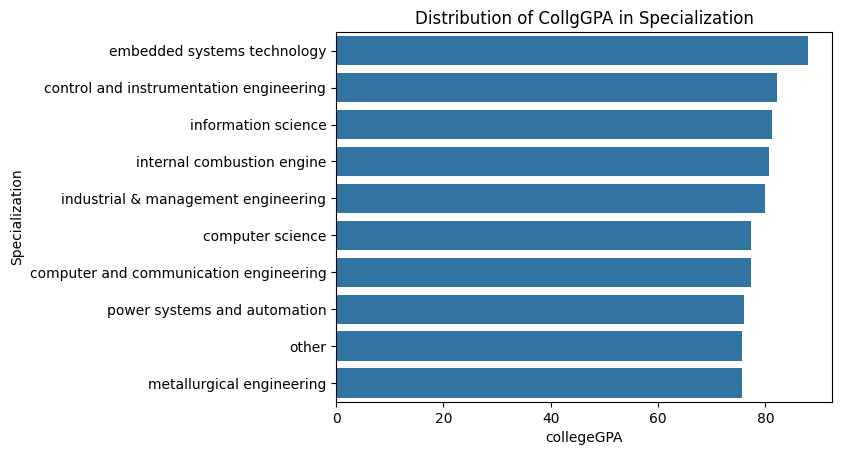

In [ ]:
sns.barplot(y=g1.index[:10], x=g1["collegeGPA"][:10])
plt.title("Distribution of CollgGPA in Specialization")
plt.show()

Embedded Systems Technology boasts the highest academic score, with an average of 88%.

In [ ]:
#Does Designation affects Salary?
g2=df.groupby("Designation")[["Salary"]].mean()
g2

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


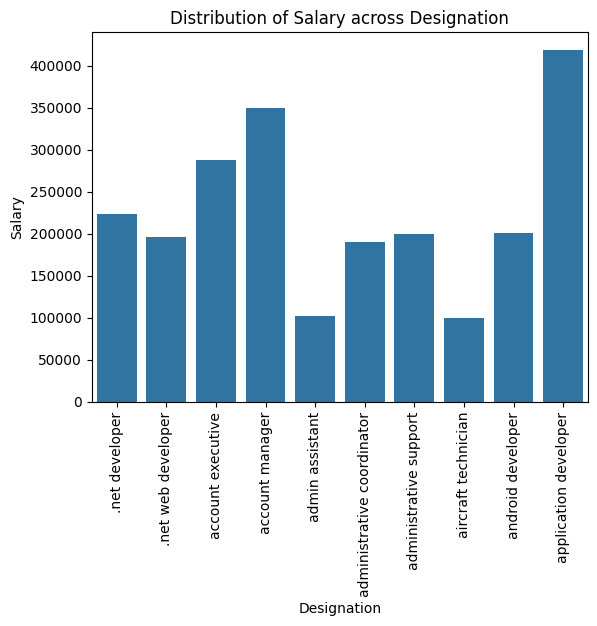

In [ ]:
sns.barplot(x=g2.index[:10],y=g2["Salary"][:10])
plt.xticks(rotation=90)
plt.title("Distribution of Salary across Designation")
plt.show()

This insight suggests that designation has an impact on salary.

**CONCLUSION**

**Insights Covered**

1. Salary Trends: Higher average salaries are associated with technical roles and in-demand specializations like Ebedded Technology compared to non-technical positions.

2. Gender Pay Gap: Significant salary disparities exist between genders, with males generally earning more than females for similar qualifications, highlighting the need for pay equity.

3. Impact of Education: A positive correlation between college GPA and salary suggests that higher academic performance can lead to better salary outcomes.

4. Regional Differences: Salary distributions vary significantly by region, with urban areas like Bangalore offering higher salaries due to factors such as cost of living and concentration of tech companies.



In conclusion, this exploratory data analysis of the AMCAT dataset has provided valuable insights into the factors influencing salary outcomes among various demographic and academic categories. By systematically examining the relationships between salary and variables such as designations, gender, specializations, college GPA, and job cities, we identified significant trends and disparities. The analysis revealed that certain designations command higher salaries, while a notable gender pay gap persists, indicating the need for further investigation into the underlying causes of these disparities. Additionally, the positive correlation between college GPA and salary underscores the importance of academic performance in securing higher-paying positions.

The regional variations in salary highlight the impact of geographical factors on compensation, suggesting that job seekers should consider location as a crucial element in their career decisions. Overall, these findings not only contribute to a deeper understanding of salary determinants but also offer actionable insights for stakeholders, including job seekers, educational institutions, and employers. Future research could build upon these insights by exploring additional variables or longitudinal trends, ultimately fostering a more equitable and informed job market.